In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras import layers
from keras import models
from keras import optimizers
import datetime
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report


Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(y_test,y_test_preds,data='test'):
    cm_test = confusion_matrix(y_test,y_test_preds)
    sns.heatmap(cm_test,cmap=sns.color_palette('Blues'),fmt ='.1f',annot=True)
    plt.ylim([8,0])
    plt.title(f"Confusion Matrix\n{data} Data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    

# Setting Directories of Images

In [3]:
# Your code here
train_dir = '../data/genres_mel_spec/CNN_folders/train'
validation_dir = '../data/genres_mel_spec/CNN_folders/val/'
test_dir = '../data/genres_mel_spec/CNN_folders/test/'


# Loading in Images and scaling them

Original images are (360,1008,3). Given the large size of this have resized images to (280,504,3) so models will run at a resonable speed

In [4]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,target_size=(180,504),
        class_mode='categorical',shuffle=False)

validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(180,504),
                                                        class_mode='categorical',shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(180,504),
                                                        class_mode='categorical',shuffle=False)

Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [5]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
validation_images, validation_labels = next(validation_generator)

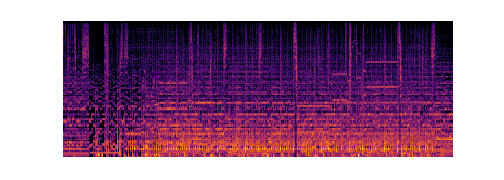

In [6]:
array_to_img(train_images[0])


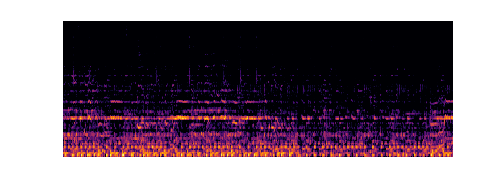

In [7]:
array_to_img(train_images[1])


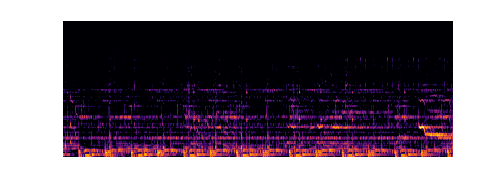

In [8]:
array_to_img(train_images[2])


In [9]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(validation_images))
print(np.shape(validation_labels))

(32, 180, 504, 3)
(32, 8)
(32, 180, 504, 3)
(32, 8)
(32, 180, 504, 3)
(32, 8)


# Building CNN

In [20]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D


In [23]:

# Build model
model = Sequential(name ='cnn')
model.add(Convolution2D(32, (3, 3), input_shape=(180, 504, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/15
 80/100 [=======================>......] - ETA: 35s - loss: 2.1277 - acc: 0.0879

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b',c='r' ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.save('../savedmodels/cnn/model.h5')


test_loss, test_acc = cnn_model.evaluate_generator(test_generator,steps=50)
print('test acc:', test_acc)

train_loss, train_acc = cnn_model.evaluate_generator(train_generator)
print('train acc:', train_acc)

test acc: 0.42125
train acc: 0.965625


In [38]:
def plot_confusion_matrix(y_test,y_test_preds,data='test'):
    cm_test = confusion_matrix(y_test,y_test_preds,labels)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.heatmap(cm_test,cmap=sns.color_palette('magma'),fmt ='.1f',annot=True,ax=ax)
    plt.title(f"Confusion Matrix\n{data} Data")
    plt.ylim([8,0])
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [39]:
#Confution Matrix and Classification Report

Y_pred = cnnmodel.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
labels = ['Electronic','Experimental','Folk','Hip-Hop','Instrumental','International','Pop','Rock']
plot_confusion_matrix(test_generator.classes, y_pred)

ValueError: At least one label specified must be in y_true

# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(180, 504),
        class_mode='categorical',shuffle=False)

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(180, 504),class_mode='categorical',shuffle=False

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(180,504),
                                                        class_mode='categorical',shuffle=False)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=50)

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

cnnmodel = models.Sequential(name='cnn model')
cnnmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180, 504, 3)))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Flatten())
cnnmodel.add(layers.Dense(512, activation='relu'))
cnnmodel.add(layers.Dropout(0.4))
cnnmodel.add(layers.Dense(8, activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

cnnhistory =cnnmodel.fit_generator(train_generator,
                        validation_data=validation_generator,
                        epochs=20,shuffle=False)

Epoch 1/20
200/200 [==============================] - 609s 3s/step - loss: 1.9507 - acc: 0.2587 - val_loss: 1.6406 - val_acc: 0.3965
Epoch 2/20
200/200 [==============================] - 608s 3s/step - loss: 1.6301 - acc: 0.4083 - val_loss: 1.5105 - val_acc: 0.4668
Epoch 3/20
200/200 [==============================] - 624s 3s/step - loss: 1.4659 - acc: 0.4792 - val_loss: 1.4599 - val_acc: 0.4768
Epoch 4/20
200/200 [==============================] - 642s 3s/step - loss: 1.3134 - acc: 0.5348 - val_loss: 1.4300 - val_acc: 0.4918
Epoch 5/20
200/200 [==============================] - 648s 3s/step - loss: 1.0997 - acc: 0.6189 - val_loss: 1.5144 - val_acc: 0.5006
Epoch 6/20
200/200 [==============================] - 641s 3s/step - loss: 0.8463 - acc: 0.7006 - val_loss: 1.6355 - val_acc: 0.4881
Epoch 7/20
200/200 [==============================] - 592s 3s/step - loss: 0.5732 - acc: 0.7994 - val_loss: 2.1245 - val_acc: 0.4630
Epoch 8/20
200/200 [==============================] - 570s 3s/step - 

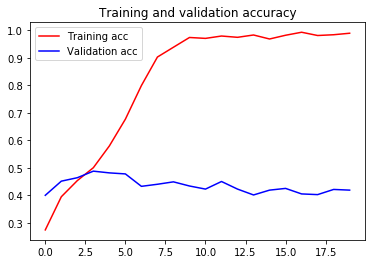

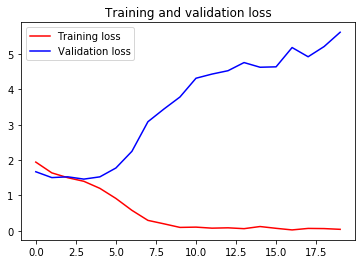

train acc: 0.99078125
test acc: 0.39875


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc =cnnhistory.history['acc']
val_acc =cnnhistory.history['val_acc']
loss =cnnhistory.history['loss']
val_loss =cnnhistory.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b',c='r' ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

cnnmodel.save('cnnmodel.h5')

train_loss, train_acc = cnnmodel.evaluate_generator(train_generator)
print('train acc:', train_acc)

test_loss, test_acc = cnnmodel.evaluate_generator(test_generator)
print('test acc:', test_acc)

# Second CNN

In [10]:
from keras import layers,models

In [11]:
from functools import partial
DefaultConv2D = partial(layers.Conv2D, kernel_initializer='he_normal',
                        kernel_size=3, activation='relu', padding="SAME")

In [12]:
model2 = models.Sequential(name = 'CNN_Model_')

model2.add(DefaultConv2D(filters=64, kernel_size=3,activation='relu', padding="same",
                    kernel_initializer='he_normal', input_shape=[180, 504, 3]))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.4))
model2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# Add dropouts to the model
model2.add(layers.Dropout(0.4))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=128, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(units=64, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(units=8, activation='softmax'))

In [13]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
history2 = model2.fit_generator(train_generator,
                              epochs=15,
                              validation_data=validation_generator,shuffle=False)

Epoch 1/15


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b',c='r' ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

train_loss, train_acc = model2.evaluate_generator(train_generator)
print('train acc:', train_acc)

test_loss, test_acc = model2.evaluate_generator(test_generator)
print('test acc:', test_acc)

# Transfer Learning

In [9]:

from keras import models,layers

In [10]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img

# Initialize Base
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(180, 504, 3))

# Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

cnn_base.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_1 True
dense_1 True
dense_2 True
dense_3 True
dense_4 True
8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 11, 31, 512)       20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 174592)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                11173952  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
Total params: 31,215,432
Trainable params: 11,191,048
Non-tra

In [ ]:
start = datetime.datetime.now()

# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

# Fitting the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=50)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Epoch 1/15
 7/50 [===>..........................] - ETA: 1:00:49 - loss: 11.4767 - acc: 0.1339

In [ ]:
# Your code here; visualize the training / validation history associated with fitting the model

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b',c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', c='r',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

train_loss, train_acc = model.evaluate_generator(train_generator)
print('train acc:', train_acc)

test_loss, test_acc = model.evaluate_generator(test_generator)
print('test acc:', test_acc)

In [78]:

# Fitting the Model
history2 = model.fit_generator(train_generator,
                              steps_per_epoch=5,
                              epochs=25,
                              validation_data=validation_generator,
                              validation_steps=5)



Epoch 1/25
5/5 [==============================] - 50s 10s/step - loss: 1.9741 - acc: 0.2250 - val_loss: 1.9214 - val_acc: 0.2437
Epoch 2/25
5/5 [==============================] - 50s 10s/step - loss: 2.0501 - acc: 0.2000 - val_loss: 1.9359 - val_acc: 0.2313
Epoch 3/25
5/5 [==============================] - 52s 10s/step - loss: 1.8436 - acc: 0.3125 - val_loss: 1.8757 - val_acc: 0.2812
Epoch 4/25
5/5 [==============================] - 53s 11s/step - loss: 1.9645 - acc: 0.2563 - val_loss: 1.8524 - val_acc: 0.3375
Epoch 5/25
5/5 [==============================] - 56s 11s/step - loss: 2.0186 - acc: 0.1625 - val_loss: 1.9289 - val_acc: 0.2548
Epoch 6/25
5/5 [==============================] - 57s 11s/step - loss: 1.9030 - acc: 0.2500 - val_loss: 1.8385 - val_acc: 0.3000
Epoch 7/25
5/5 [==============================] - 57s 11s/step - loss: 2.1153 - acc: 0.2000 - val_loss: 2.0381 - val_acc: 0.1875
Epoch 8/25
5/5 [==============================] - 58s 12s/step - loss: 1.9357 - acc: 0.2500 - val

KeyboardInterrupt: 

In [ ]:
# Your code here; visualize the training / validation history associated with fitting the model


acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.hi2story['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b',c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', c='r',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()